<a href="https://colab.research.google.com/github/codyub/ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_(ch2_1_5_87_131).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 사이킷런으로 시작하는 머신러닝

# 01 사이킷런 소개와 특징

- 사이킷런은 파이썬 머신러닝 라이브러리 중 가장 많이 사용되는 라이브러리로, 최근에는 텐서플로, 케라스 등 딥러닝 전문 라이브러리가 강세지만 여전히 많은 데이터 분석가가 사용한다. 

사이킷런의 특징
- 파이썬 기반의 다른 머신러닝 패키지도 사이킷런 스타일의 API를 지향할 정도로 쉽고 파이썬 스러운 API를 제공한다. 
- 머신러닝을 위한 다양한 알고리즘과 개발을 위한 편리한 프레임워크와 API를 제공한다. 
- 오랜기간 실전 환경에서 검증됐으며, 많은 환경에서 사용되는 성숙한 라이브러리이다. 

In [1]:
import sklearn
import numpy as np
import pandas as pd
import scipy

# 02 첫 번째 머신러닝 만들어 보기: 붓꽃 품종 예측하기

- 붓꽃의 품종을 분류하는 것으로, 데이터는 꽃잎의 길이와 너비, 꽃받침의 길이와 너비를 기반으로 품종을 예측할 수 있도록 하고 있다. 
- 분류: 대표적인 지도학습 방법 중 하나로, 학습을 위한 다양한 피처와 분류 결정값인 레이블 데이터로 모델을 학습한 뒤, 별도의 테스트 데이터 세트에서 미지의 레이블을 예측한다. 즉, 명확한 답이 주어진 데이터 세트를 먼저 학습한 뒤, 미지의 정답을 예측한다. 
- 학습을 위해 주어진 데이터 세트를 학습 데이터 세트, 머신러닝 모델의 예측 성능을 평가하기 위해 별도로 주어진 데이터 세트를 테스트 데이터 세트로 지칭한다. 

- sklearn.datasets : 내의 모듈은 사이킷런에서 자체적으로 제공하는 데이터 세트를 생성하는 모듈의 모임
- sklearn.tree: 내의 모듈은 트리 기반 머신러닝 알고리즘을 구현한 클래스의 모임
- sklearn.model_selection: 학습 데이터와 검증 데이터, 예측 데이터로 데이터를 분리하거나 최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈의 모임
- 하이퍼 파라미터: 머신러닝 알고리즘별로 최적의 학습을 위해 직접 입력하는 파라미터들을 통칭하며, 하이퍼 파라미터를 통해 머신러닝 알고리즘의 성능을 튜닝할 수 있다. 

- load_iris() : 붓꽃 데이터세트 생성
- DecisionTreeClassifier: 위 데이터에 적용할 머신러닝 알고리즘(의사결정트리)
- train_test_split(): 데이터 세트를 학습 데이터와 테스트 데이터로 분리하는 데 사용하는 함수

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

1. load_iris() 함수를 이용해 붓꽃 데이터 세트를 로딩한 후 피처들과 데이터 값이 어떻게 구성돼 있는지 확인하기 위해 데이터 프레임으로 변환 

In [3]:
import pandas as pd

# 붓꽃 데이터 세트 로딩
iris = load_iris()

# iris.data는 iris 데이터 세트에서 피처만으로 된 데이터를 numpy로 갖고 있다. 
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(결정값) 데이터를 numpy로 갖고 있다. 
iris_label = iris.target
print('iris target 값:', iris_label)
print('iris target 명:', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환한다.
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target 값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target 명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


feature에는 sepal length (cm)	sepal width (cm)	petal length (cm)	petal width (cm)가 존재하며, 	label은 0,1,2 세 가지 값으로 되어 있다. (setosa/versicolor/virginica)

2. 학습용 데이터셋과 테스트용 데이터셋 분리
> test_size: 파라미터 값의 입력 비율에 따라 분리됨(test 데이터 기준)



In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

- train_test_split(데이터셋, 레이블데이터셋, 테스트데이터의 비율, 호출할때마다 같은 데이터셋 생성을 위해 주어지는 난수 발생(없으면 무작위 발생으로 수행할때마다 다른 데이터세트로 구성됨))
- 결과: X_train(학습용 피처 데이터 세트), X_test(테스트용 피처 데이터 세트),y_train(학습용 레이블 데이터 세트), y_test(테스트용 레이블 데이터 세트)

3. 학습 수행

In [5]:
# DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=11)

4. 예측 수행

In [6]:
# 헉습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred = dt_clf.predict(X_test)

5. 예측 결과를 기반으로 예측 성능을 평가: 여기서는 정확도롤 측정(accuracy_score())

In [7]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9333


# 위 과정 정리
1. 데이터 세트 분리: 데이터를 학습 데이터와 테스트 데이터로 분리
2. 모델 학습: 학습 데이터를 기반으로 ML 알고리즘을 적용해 모델을 학습시킴
3. 예측 수행: 학습된 ML 모델을 이용해 테스트 데이터의 분류(즉, 붓꽃 종류)를 예측함
4. 평가: 예측된 결괏값과 테스트 데이터의 실제 결괏값을 비교해 ML 모델 성능을 평가함. 

# 03 사이킷런의 기반 프레임워크 익히기

# Estimator 이해 및 fit(), predict() 메서드

- 사이킷런은 API의 일관성과 개발 편의성을 제공함. ML 모델 학습을 위해서 fit(), 학습된 모델의 예측을 위해 predict() 메서드를 제공
- 지도학습의 주요 두 축인 분류와 회귀의 다양한 알고리즘을 구현한 모든 사이킷런 클래스는 fit()과 predict()만을 이용해 간단하게 학습과 예측 결과를 반환함
- Classifier: 분류 알고리즘을 구현한 클래스
- Regressor: 회귀 알고리즘을 구현한 클래스
- 위 둘을 Estimator 클래스라고 부른다. (지도학습의 모든 알고리즘을 구현한 클래스를 통칭), fit()과 predcit()를 내부에서 구현
cross_val_score()와 같은 evaluation 함수, GridSearchCV와 같은 하이퍼 파라미터 튜닝을 지원하는 클래스의 경우 이 Estimator를 인자로 받음
- 인자로 받은 Estimator에 대해서 cross_val_score(), GridSearchCV.fit() 함수 내에서 이 Estimator의 fit()과 predict()를 호출해서 평가를 하거나 하이퍼 파라미터 튜닝을 수행하는 것

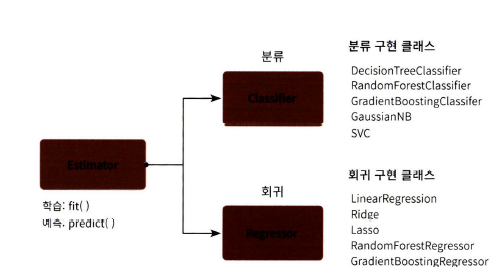

- 사이킷런에서 비지도 학습인 차원축소, 클러스터링, 피처 추출 등을 구현한 클래스도 대부분 fit()과 transform()을 적용함
- 비지도학습과 피처 추출에서 fit()은 지도학습의 fit()과 같이 학습을 의미하는 것이 아니라 입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 구조를 맞추는 작업
- fit()으로 변환을 위한 사전 구조를 맞추면 이후 입력 데이터의 차원 변환, 클러스터링, 피처 추출 등의 실제 작업은 transform()으로 수행
- fit()과 transform()을 하나로 결합한 fit_transform()도 함께 제공, 하지만 사용에 주의가 필요함

# 사이킷런의 주요 모듈

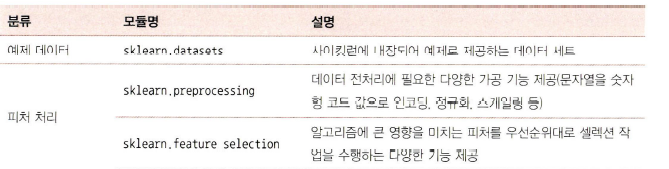

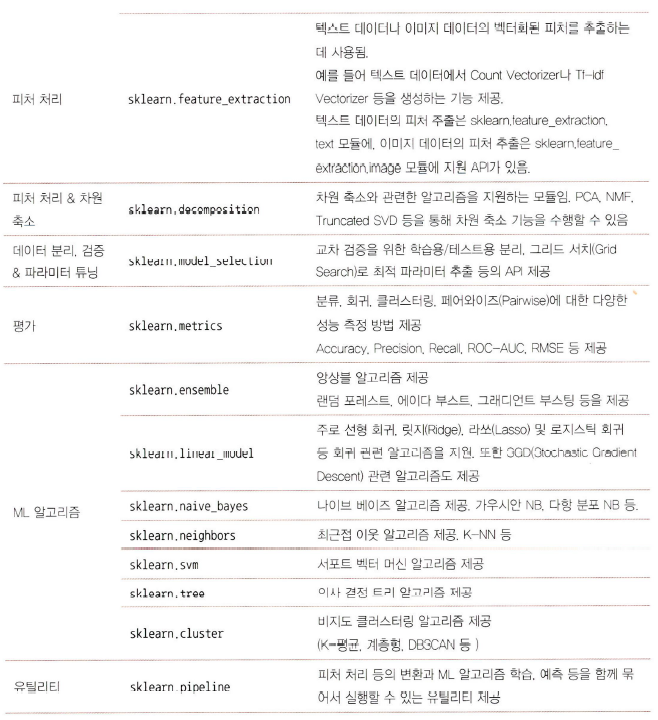

- 일반적인 머신러닝 모델 구축 주요 프로세스는 피처의 가공, 변경, 추출을 수행하는 피처 처리, ML 알고리즘 학습/예측 수행, 모델 평가의 단계를 반복적으로 수행 하는 것
- 사이킷런 패키지는 머신러닝 모델을 구축하는 주요 프로세스를 지원하기 위해 매우 편리하고 다양하며 유연한 모듈을 지원함, 이러한 편리성, 다양성, 유연성이 ML 개발로 사이킷런을 사용하는 것

# 내장딘 예제 데이터 세트

- 사이킷런에는 별도의 외부 웹사이트에서 데이터 세트를 받지 않아도 활용할 수 있는 데이터 세트가 몇 개 내장돼 있음
- 내장된 데이터 세트는 분ㄹ류나 회귀 연습을 위한 예제 용도의 데이터 세트와 분류나 클러스터링을 위해 표본 데이터로 생성될 수 있는 데이터 세트로 나눠짐

분류나 회귀 연습용 예제 데이터

- datasets.load_boston(): 회귀 용도, 미국 보스턴 집 피처와 가격에 대한 데이터
- datasets.load_beast_cancer(): 분류 용도, 위스콘신 유방암 피처들과 악성/음성 레이블 데이터
- datasets.load_diabetes(): 회귀 용도, 당뇨 데이터
- datasets.load_digits(): 분류 용도, 0에서 9까지 숫자의 이미지 픽셀 데이터
- datasets.load_iris(): 분류 용도, 붓꽃에 대한 피처를 가진 데이터

fetch 계열의 명령은 데이터 크기가 커서 패키지에 처음부터 저장돼 있지 않고, 인터넷에서 내려받아 홈 디렉터리 아래의 scikit_learn_data라는 서브 디렉터리에 저장한 후 추후 불러들이는 데이터(인터넷 연결 필수)

- fetch_covtype(): 회귀 분석용 토지 조사 자료
- fetch_20newsgroups(): 뉴스 그룹 텍스트 자료
- fetch_olivetti_faces(): 얼굴 이미지 자료
- fetch_lfw_people(): 얼굴 이미지 자료
- fetch_ㅣlfw_pairs(): 얼굴 이미지 자료
- fetch_rcvl(): 로이스터 뉴스 말뭉치(1인지 l인지 모르겠음)
- fetch_mldata(): ML 웹사이트에서 다운로드

분류와 클러스터링을 위한 표본 데이터 생성기

- datasets.make_classifications(): 분류를 위한 데이터 세트를 만든다. 특히 높은 상관도, 불필요한 속성 등의 노이즈 효과를 위한 데이터를 무작위로 생성
- datasets.make_blobs(): 클러스터링을 위한 데이터 세트를 무작위로 생성, 군집 지정 개수에 따라 여러가지 클러스터링을 위한 데이터 세트를 쉽게 만들어줌
* 표본 데이터 생성기는 위 외에도 많음 

개별 키의 구성: data, target, target_name, feature_names, DESCR
- data: 피처의 데이터 세트를 의미
- target: 분류 시 레이블 값, 회귀일 때는 숫자 결괏값 데이터 세트
- target_name: 개별 레이블의 이름
- feature_names: 피처의 이름
- DESCR: 데이터 세트에 대한 설명과 각 피처의 설명

- data, target: 넘파이 배열
- target_name, feature_names: 넘파이 배열 또는 파이썬 리스트
- DESCR: 스트링 타입
- 피처의 데이터 값을 반환받기 위해서는 내장 데이터 세트 API를 호출한 뒤에 그 Key 값을 지정하면 됨. 

1. 데이터를 가져오기

In [8]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils.Bunch'>


- Bunch 클래스는 파이썬 딕셔너리 자료형과 유사, 데이터세트에 내장된 대부분의 데이터 세트는 딕셔너리 형태의 값을 반환함. 

2. 데이터 세트의 key 값을 확인하기

In [9]:
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들: ', keys)

붓꽃 데이터 세트의 키들:  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


- 데이터의 키는 피처들의 데이터 값을 가리킴. 
- 데이터가 딕셔너리 이므로, 피처 데이터 값을 추출하기 위해 데이터세트.data를 이용하면 된다. (다른 피쳐도 동일함)

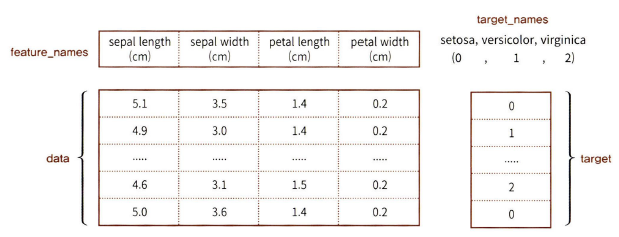

3. load_iris()가 반환하는 객체의 키가 가리키는 값을 모두 출력

In [10]:
print('\n feature_names의 type: ', type(iris_data.feature_names))
print(' feature_names의 shape: ', len(iris_data.feature_names)) # 리스트이므로, shape을 알아보기 위해 len을 사용
print(iris_data.feature_names)

print('\n target_names의 type: ', type(iris_data.target_names))
print(' target_names의 shape: ', len(iris_data.target_names)) # 개수가 3개인 넘파이 이므로, shape을 알아보기 위해 len을 사용
print(iris_data.target_names)

print('\n data의 type: ', type(iris_data.data))
print(' data의 shape: ', iris_data.data.shape) # 넘파이 이므로, shape 사용
print(iris_data['data'])

print('\n target의 type: ', type(iris_data.target))
print(' target의 shape: ', iris_data.target.shape) # 넘파이 이므로, shape 사용
print(iris_data.target)


 feature_names의 type:  <class 'list'>
 feature_names의 shape:  4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names의 type:  <class 'numpy.ndarray'>
 target_names의 shape:  3
['setosa' 'versicolor' 'virginica']

 data의 type:  <class 'numpy.ndarray'>
 data의 shape:  (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.

# 04 Model Selection 모듈 소개

- 사이킷런의 model_selection 모듈은 학습 데이터와 테스트 데이터 세트를 분리하거나 교차 검증 분할 및 평가, 그리고 Estimator의 하이퍼 파라미터를 튜밍하기 위한 다양한 함수와 클래스를 제공

1. 학습/테스트 데이터 세트 분리 - train_test_split()

- 테스트 데이터 세트를 이용하지 않고, 학습 데이터 세트로만 학습하고 예측하면 생기는 문제를 먼저 알아 볼 것(학습과 예측을 동일한 데이터 세트로 수행)

In [11]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

# 학습 데이터 세트로 예측 수행
pred = dt_clf.predict(train_data)
print('예측 정확도: ', accuracy_score(train_label, pred))

예측 정확도:  1.0


정확도 100이 나옴 why? 같은 시험지를 두 번 풀게 한 것이므로 --> 테스트와 훈련 데이터 세트 분리의 필요성

2. 붓꽃 데이터를 학습 및 테스트 데이터 세트로 분리 : train_test_split(피처 데이터 세트, 레이블 데이터 세트, 선택: 다음 파라미터)

- test_size: 전체 데이터에서 테스트 데이터 세트 크기를 얼마로 샘플링할 것인가 결정, 디폴트 -.25
- train_size: 저네 데이터에서 학습용 데이터 세트 크기를 얼마로 샘플링할 것인가 결정, 위를 주로 사용하기 때문에 이건 잘 사용되지 않음
- shuffle: 데이터를 분리하기 전에 데이터를 미리 섞을 지 결정. 디폴트는 True. 데이터를 분산시켜서 좀 더 효율적인 학습 및 테스트 데이터 세트를 만드는 데 사용
- random_state: 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값.  train_test_split은 호출 시 무작위로 데이터를 분리하므로, random state를 지정핮 않으면 수행할 때마다 다른 데이터 생성.
-  train_test_split의 반환값은 튜플. (학습용 데이터의 피처 데이터 세트, 테스트용 데이터의 피처 데이터 세트, 학습용 데이터의 레이블 데이터 세트, 테스트용 데이터의 레이블 데이터 세트) 로 반환

In [12]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 데이터를 구분함 
iris_data = load_iris()
dt_clf = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.3, random_state=121)


In [13]:
# 학습 데이터 세트로 예측 수행
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:4f}',format(accuracy_score(y_test, pred)))

예측 정확도: {0:4f} 0.9555555555555556


# 교차 검증

- 학습 데이터와 예측 성능 평가를 위한 테스트용 데이터를 분리하는 방법 또한 과적합에 취약한 약점을 가질 수 있다.
- 과적합: 모델이 학습 데이터에만 과도하게 최적화 되어, 실제 예측을 다른 데이터로 수행할 경우에는 예측 성능이 과도하게 떨어지는 것을 말한다. 
- 고정된 학습 데이터 및 테스트 데이터로만 평가를 하다보면 편향되게 모델을 유도하는 경향이 생김.
- 해결 방안 -> 교차 검증
- 교차 검증: 교차 검증에서 많은 학습과 검증 세트에서 알고리즘 학습과 평가를 수행하는 것. 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행하는 것. 
- 대부분의 ML 모델의 성능 평가는 교차 검증 기반으로 1차 평가를 한 뒤에 최종적으로 테스트 데이터 세트에 적용해 평가하는 프로세스. 
- ML에 사용되는 데이터 세트를 세분화해 학습, 검증, 테스트 데이터 세트로 나눌 수 있음
- 테스트 데이터 외 별도의 검증 데이터 세트를 둬 최종 평가 이전에 학습된 모델을 다양하게 평가하는 데 사용

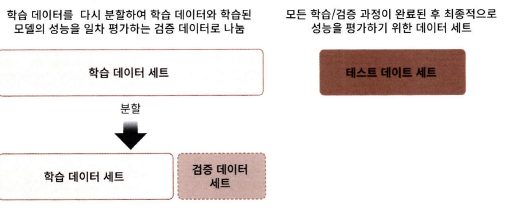

# K 폴드 교차 검증

- k개의 데이터 폴드 세트를 만들어 k번만큼 각 포드 세트에 학습과 검증 평가를 반복적으로 수행하는 방법

> 먼저 k개의 데이터 폴드 세트를 만들어 k번만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행
1. 5개의 폴드된 데이터 세트를 학습과 검증을 위한 데이터 세트로 변경
2. 5번의 평가를 수행
3. 위 5개의 평가를 평균한 결과로 예측 성능을 평가 


예) 
1. 데이터 세트를 k등분함
2. 첫 번째 반복에서는 처음부터 4개를 학습 데이터, 마지막 한 개를 검증 데이터 세트로 설정
2. 학습 데이터 세트로 학습을 수행, 검증 데이터 세트로 평가를 수행
3. 위 과정을 학습과 데이터 세트 구성을 바꿔 비슷한 학습과 평가 작업을 수행

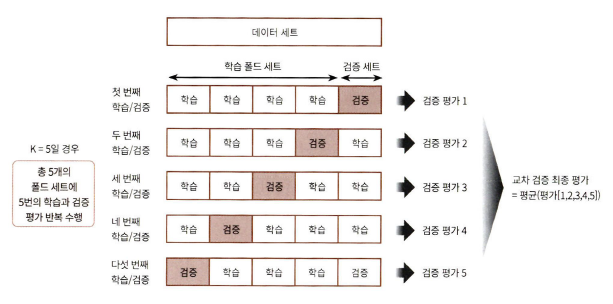

- 사이킷런에서는 K 폴드 교차 검증 프로세스를 구현하기 위해 KFold와 StratifiedKFold 쿨래스를 제공

# KFold 클래스를 이용해 붓꽃 데이터 세트를 교차 검증하고 예측 정확도 알아보기

1. 붓꽃 데이터 세트와 DecisionTreeClassifier를 다시 생성해 5개의 폴드 세트로 분리하는 KFold 객체를 생성

In [14]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris() # iris data를 불러오기
features = iris.data # 데이터를 모두 불러오기
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits=5) # 5개의 폴드 세트로 분리한 것을 담음
cv_accuracy = [] # 각 세트별 정확도를 담기 위해 빈 리스트 생성
print('붓꽃 데이터 세트 크기: ', features.shape[0])

붓꽃 데이터 세트 크기:  150


2. 생성된 KFold 객체의 split()을 호출해 전체 붓꽃 데이터를 5개의 폴드 데이터 세트로 분리 (학습용 4/5 =120개, 검증 테스트 1/5=30개)

In [15]:
n_iter = 0

# KFold 객체의 split()를 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반화
for train_index, test_index in kfold.split(features): # 아까 데이터를 모두 불러온 feature 값을 train index와 test index로 나눔
  # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = features[train_index], features[test_index] # 데이터 각각에 대한 인덱스
  y_train, y_test = label[train_index], label [test_index] # 데이터에 해당하는 정답에 대한 인덱스

  # 학습 및 예측
  dt_clf.fit(X_train,y_train) # 모델을 피팅함
  pred = dt_clf.predict(X_test) # 피팅한 모델에 대한 test 데이터를 통해 예측한 것을 받음
  n_iter += 1

  # 반복시마다 정확도 측정
  accuracy = np.round(accuracy_score(y_test,pred),4) # 예측이 실제 정답과 얼마나 맞는 지 정확도를 측정함
  train_size = X_train.shape[0] # 글자 그데이터 학습한 데이터의 사이즈가 얼마인지 전달받음 
  test_size = X_test.shape[0]
  print('\n {0} 교차 검증 정확도: {1} 학습 데이터 크기: {2} 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
  print('\n {0} 검증 세트 인덱스: {1}'.format(n_iter, test_index))
  cv_accuracy.append(accuracy)

# 개별 iteration별 정확도를 합해 평균 정확도를 계산
print('\n ## 평귬 검증 정확도: ', np.mean(cv_accuracy))


 1 교차 검증 정확도: 1.0 학습 데이터 크기: 120 검증 데이터 크기: 30

 1 검증 세트 인덱스: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

 2 교차 검증 정확도: 0.9667 학습 데이터 크기: 120 검증 데이터 크기: 30

 2 검증 세트 인덱스: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

 3 교차 검증 정확도: 0.8667 학습 데이터 크기: 120 검증 데이터 크기: 30

 3 검증 세트 인덱스: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

 4 교차 검증 정확도: 0.9333 학습 데이터 크기: 120 검증 데이터 크기: 30

 4 검증 세트 인덱스: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

 5 교차 검증 정확도: 0.7333 학습 데이터 크기: 120 검증 데이터 크기: 30

 5 검증 세트 인덱스: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

 ## 평귬 검증 정확도:  0.9


# stratified K 폴드

- 불균형한 분포도를 가진 레이블(결정 클래스) 데이터 집합을 위한 K 폴드 방식.
- 불균형한 분포도를 가진 레이블 데이터 집합은 특정 레이블 값이 특이하게 많거나 매우 적어 값의 분포가 한쪽으로 치우치는 것을 말한다. 
예) 대출 사기 데이터 예측에 있어서, 데이터 세트가 1억건이고 대출사기 레이블이 있을 때, 대부분의 데이터는 정상 대출이고, 1억건 중 1천건만이 사기이면, 너무 작은 비율로 레이블 값이 있어, K 폴드로 랜덤하게 학습 및 테스트 세트의 인덱스를 고르더라도 레이블 결과를 잘 반영하지 못함.
- 하지만, 대출 사기 데이터는 결과 예측을 위한 중요한 피쳐를 갖고 있는 데이터이므로 매우 중요한 데이터 세트임. 따라서, 원본 데이터와 유사한 대출 사기 레이블 값의 분포를 학습/테스트 세트에도 유지하는 것이 매우 중요하다. 
- stratified K폴드는 이를 위해 원본 데이터의 레이블 분포를 먼저 고려한 뒤, 이 분포와 동일하게 학습과 검증 데이터 세트를 분배함. 

# K 폴드의 문제점을 먼저 확인해 보고 이를 사이킷런의 StratifiedKFold 클래스를 이용해 개선해보자

1. 붓꽃 데이터 세트를 간단하게 DataFrame으로 생성하고 레이블 값의 분포도를 확인함.

In [16]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts() # 레이블의 값은 모두 50개로 동일함. 

0    50
1    50
2    50
Name: label, dtype: int64

2. 이슈가 발생하는 현상을 도출하기 위해 3개의 폴드 세트를 KFold로 생성하고, 각 교차 검증시마다 생성되는 학습/검증 데이터 값의 분포도를 확인

In [17]:
kfold = KFold(n_splits=3)
n_iter = 0

for train_index, test_index in kfold.split(iris_df):
  n_iter += 1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('## 교차 검증: {0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('검증 레이블 데이터 분포:\n', label_test.value_counts())

# 교차검증시마다 3개의 폴드 세트로 만들어지는 학습 레이블과 검증 레이블이 완전히 다른 값으로 추출되었음
# 예를 들어, 첫 번째 교차 검증에서는 학습 레이블의 1,2 값이 각각 50개가 추출되었고, 검증 레이블의 0  값이 50개 추출. 이 경우는 전혀 학습하지 못하게 되며, 학습 모델은 절대 0을 예측할 수 없게 됨
# --> 이 상태로 데이터 세트를 분할하면 검증 예측 정확도는 0이 됨.

## 교차 검증: 1
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


3. 동일한 데이터 분할은 StratifiedKFold로 수행하고 학습/검증 레이블 데이터의 분포도를 확인 (주의: 레이블 데이터 분포도에 따라 학습/검증 데이터를 나누기 때문에 split() 메서드에 인자로 피처 데이터 세트만이 아닌 레이블 데이터 세트도 필요함)

In [18]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter=0


for train_index, test_index in skf.split(iris_df, iris_df['label']):
  n_iter += 1
  label_train = iris_df['label'].iloc[train_index]
  label_test = iris_df['label'].iloc[test_index]
  print('## 교차 검증 : {0}'.format(n_iter))
  print('학습 레이블 데이터 분포:\n', label_train.value_counts())
  print('검증 레이블 데이터 분포:\n', label_test.value_counts())

# 출력 결과, 학습 레이블과 검증 레이블 데이터 값의 분포도가 동일하게 할당됨.

## 교차 검증 : 1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차 검증 : 2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차 검증 : 3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64


4. StratifiedKFold를 이용해 데이터를 교차 검증

In [19]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

# StratifiedKFold의 split() 호출 시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label): # 아까 데이터를 모두 불러온 feature 값을 train index와 test index로 나눔
  # split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
  X_train, X_test = features[train_index], features[test_index] # 데이터 각각에 대한 인덱스
  y_train, y_test = label[train_index], label [test_index] # 데이터에 해당하는 정답에 대한 인덱스

  # 학습 및 예측
  dt_clf.fit(X_train,y_train) # 모델을 피팅함
  pred = dt_clf.predict(X_test) # 피팅한 모델에 대한 test 데이터를 통해 예측한 것을 받음

  # 반복시마다 정확도 측정
  n_iter+=1
  accuracy = np.round(accuracy_score(y_test,pred),4) # 예측이 실제 정답과 얼마나 맞는 지 정확도를 측정함
  train_size = X_train.shape[0] # 글자 그데이터 학습한 데이터의 사이즈가 얼마인지 전달받음 
  test_size = X_test.shape[0]
  print('\n {0} 교차 검증 정확도: {1} 학습 데이터 크기: {2} 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
  print('\n {0} 검증 세트 인덱스: {1}'.format(n_iter, test_index))
  cv_accuracy.append(accuracy)

# 교차 검증별 정확도 및 평균 정확도 계산
print('\n ## 교차 검증별 정확도: ', np.round(cv_accuracy,4))
print('\n ## 평균 검증 정확도: ', np.mean(cv_accuracy))


 1 교차 검증 정확도: 0.98 학습 데이터 크기: 100 검증 데이터 크기: 50

 1 검증 세트 인덱스: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

 2 교차 검증 정확도: 0.94 학습 데이터 크기: 100 검증 데이터 크기: 50

 2 검증 세트 인덱스: [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

 3 교차 검증 정확도: 0.98 학습 데이터 크기: 100 검증 데이터 크기: 50

 3 검증 세트 인덱스: [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

 ## 교차 검증별 정확도:  [0.98 0.94 0.98]

 ## 평균 검증 정확도:  0.9666666666666667


# 교차 검증을 보다 간편하게 - corss_val_score()

corss_val_score() : 아래의 과정을 한 번에 수행해줌
1. 폴드 세트를 설정
2. for 루프에서 반복으로 학습 및 테스트 데이터의 인덱스를 추출
3. 반복적으로 학습과 예측을 수행하고 예측 성능을 반환

cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs))
- 주요 파라미터: estimator, X, y=None, scoring=None, cv=None
-estimator: 사이킷런의 분류 알고리즘 클래스인 Classifier 또는 회귀 알고리즘 클래스인 Regressor를 의미
- X: 피처 데이터 세트
- Y: 레이블 데이터 세트
- scoring: 예측 성능 평가 지표를 기술
- cv: 교차 검증 폴드의 수 
- cross_val_score() 수행 후 반환 값은 scoring 파라미터로 지정된 성능 지표 측정값을 배열 형태로 반환

- cross_val_score는 classifier가 입력되면 Stratified K 폴드 방식으로 레이블 값의 분포에 따라 학습/테스트 세트를 분할.
- 회귀의 경우는 위 방법을 못하므로, k폴드 방식으로 분할

# cross_val_score 알아보기 : 교차검증 폴드 수 =3, 성능 평가 지표는 정확도인 accuracy

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도, 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3) # cv로 지정된 횟수만큼 지정된 평가 지표로 평가 결괏값을 배열로 반환함
print('교차 검증별 정확도: ',np.round(scores,4))
print('평균 검증 정확도: ', np.round(np.mean(scores),4))

교차 검증별 정확도:  [0.98 0.94 0.98]
평균 검증 정확도:  0.9667


# GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에

- 하이퍼 파라미터는 머신러닝 알고리즘을 구성하는 주요 구성 요소이며, 이 값을 조정해 알고리즘의 예측 성능을 개선할 수 있다. 
- 사이킷런은 GridSearchCV를 통해, 분류나 회귀같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있는 방안을 재공한다.
- Grid: 격자라는 의미로, 촘촘하게 파라미터를 입력하면서 테스트를 하는 방식
- 예) 결정트리 알고리즘의 여러 하이퍼 파라미터를 순차적으로 변경하면서 최고 성능을 가지는 파라미터 조합을 찾고자 한다면 다음과 같이 파라미터의 집합을 만들고 이를 순차적으로 적용하면서 최적화를 수행

In [21]:
grid_parameters = {'max_depth':[1, 2, 3],
                  'min_samples_split': [2,3]
                  }

- 하이퍼 파라미터는 다음과 같이 순차적으로 적용됨
- 총 6회에 걸쳐 파라미터를 순차적으로 바꿔 실행하면서 최적의 파라미터와 수행 결과를 도출
- for 루프로 모든 파라미터를 번갈아 입력하면서 학습시키는 방법을 좀 더 유연하게 API 레벨에서 제공한 것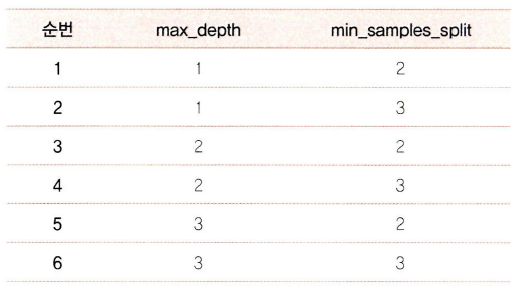

- GridSearchCV는 교차 검증을 기반으로 하이퍼 파라미터의 최적 값을 찾게 해줌
- 데이터 세트를 cross-validation을 위한 학습/테스트 세트로 자동으로 분할한 뒤 하이퍼 파라미터 그리드에 기술된 모든 파라미터를 순차적으로 적용해 최적의 파라미터를 찾을 수 있게 해줌
- GridSearchCV는 사용자가 튜닝하고자 하는 여러 종류의 하이퍼 파라미터를 다양하게 테스트하면서 최적의 파라미터를 편리하게 찾게 해주지만 동시에 순차적으로 파라미터를 테스트 하므로 시간이 상대적으로 오래 걸린다는 단점이 있다. 
- CV가 3회라면 개별 파라미터 조합마다 3개의 폴딩 세트를 3회에 걸쳐 학습/평가해 평균 값으로 성능을 측정한다. 
- 위와 같이 6개의 파라미터 조합이면 3*6 = 18개 파라미터 조합으로 학습/평가가 이뤄진다. 

# GridSearchCV 클래스의 생성자로 들어가는 주요 파라미터


> - estimator: 분류, 회귀, pipeline이 사용될 수 있다. 
> - param_grid: key+리스트 값을 가지는 딕셔너리가 주어짐, estimator 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값을 지정
> - scoring: 예측 성능을 측정할 평가 방법을 지정함, 보통 사이킷런의 성능 평가 지표를 지정하는 문자열(예: 정확도의 경우 'accuracy')로 지정하나, 별도의 성능 평가 지표 함수도 지정할 수 있다.
> - cv: 교차 검증을 위해 분할되는 학습/데이터 세트의 개수를 지정함
> - refit: 디폴트가 True이며, True로 생성 시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습시킴 

 결정트리 알고리즘의 여러 최적화 파라미터를 순차적으로 적용해 붓꽃 데이터 예측 분석을 하는 데, GridSearchCV를 이용하자

1. train_test_split()을 이용해 학습 데이터와 붓꽃 데이터를 예측 분석하는 데 GridSearchCV르 ㄹ이용함


> 테스트 데이터를 먼저 분리하고 학습 데이터에서 GridSearchCV를 이용해 최적 하이퍼 파라미터를 추출, 



In [22]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier() # 중요 하이퍼 파라미터는 max_depth와 min_samples_split

## 파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth':[1, 2, 3], 'min_samples_split':[2, 3]} # 명칭은 문자열 키값, 하이퍼 파라미터의 값은 리스트 형으로 설정

2. 학습 데이터세트를 GridSearchCV 객체의 fit(학습 데이터 세트) 메서드에 인자로 입력 
- 학습 데이터를 cv에 기술된 폴딩 세트로 분할해 param_grid에 기술된 하이퍼 파라미터를 순차적으로 변경하면서 학습/평가를 수행하고 그 결과를 cv_results_ 속성에 기록
- cv_results_는 GridSearchCV의 결과 세트로, 딕셔너리 형태로 key 값과 리스트 형태의 value 값을 가짐 (판다스 데이터 프레임으로 변환하면 내용을 더 쉽게 볼 수 있음)

In [23]:
import pandas as pd

# param_grid의 하이퍼 파라미터를 3개의 train, test set fold로 나누어 테스트 수행 설정.
### refit=True가 default임. True이면 가장 좋은 파라미터 설정으로 재학습시킴.
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가.
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과를 추출해 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


총 6개의 결과를 볼 수 있음
> - params: 수행할 때마다 적용된 하이퍼 파라미터 값을 갖고 있음
- mean_test_score: 해당 파라미터 조합인 max_depth:3, min_samples_split:2로 평가한 결과 예측 성능이 몇 위인지 보여줌(1이 가장 뛰어남)
- rank_test_score:테스트 평균 점수(아래 값들의 평균임)
- split0_test_score/split1_test_score/split2_test_score: cv가 3개인 경우, 3개의 폴딩 세트에서 각각 테스트한 성능 수치



3. GridSearchCV 객체의 fit()을 수행하면 최고 성능을 나타낸 하이퍼 파라미터의 값과 그때의 평가 결과 값이 각각 best_params_, best_score_ 속성에 기록됨

In [33]:
# 위 속성을 이용해 최적 하이퍼 파라미터의 값과 그 때의 정확도를 알아보겠다.
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}:'.format(grid_dtree.best_score_), grid_dtree.best_params_)

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.9750: {'max_depth': 3, 'min_samples_split': 2}


- GridSearchCV 객체의 생성 파라미터로 refit=True가 디폴트 -> 이는 estimator를 학습해 best_estimator_로 저장함. 


4. 이미 학습된 best_estimator_를 이용해 앞에서 train_test_split()으로 분리한 테스트 데이터 세트에 대해 예측하고 성능을 평가할 것


In [34]:
# GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator 는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도: 0.9667


# 05 데이터 전처리

- 사이킷런은 결손값(NaN, Null)을 허용하지 않기 때문에, 고정된 다른 값으로 변환해야 한다. 
- null 값이 얼마 되지 않는다면 평균 값 등으로 간단히 대체할 수 있지만, 대부분이 결손값이라면 해당 피처는 드롭하는 것이 더 낫다.
- 사이킷런은 문자열 값을 입력 값으로 허용하지 않기 때문에, 모든 무자열 값은 인코딩 돼서 숫자 형으로 변환해야 한다.
- 문자열 피처는 일반적으로 카테고리형과 텍스트형을 의미

# 데이터 인코딩

머신러닝을 위한 대표적인 인코딩 방식: 레이블 인코딩, 원-핫 인코딩


> - 레이블 인코딩: 카테고리 피처를 코드형 숫자 값으로 변환하는 것. 주의할 점: '01'과 같은 코드 값도 문자열이므로, 숫자형으로 값을 변환해야 함
- 원-핫 인코딩: 피처 값의 유형에 따라 새롱누 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식(행 형태로 돼 있는 피처 고유 값을 열 형태로 차원을 변환해 고유값에 해당하는 칼럼에만 1, 나머지 칼럼에는 0)



# 레이블 인코딩


> LabelEncoder 클래스로 구현, LabelEncoder를 객체로 생성한 후 fit()과 transform()을 호출해 레이블 인코딩을 수행


In [24]:
from sklearn.preprocessing import LabelEncoder

items=['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 클래스:', encoder.classes_)
print('인코딩 변환값:', labels)
print('디코딩 원본값:', encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']
인코딩 변환값: [0 1 4 5 3 3 2 2]
디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


In [36]:
print('인코딩 클래스: ', encoder.classes_)
print('디코딩 원본값: ', encoder.inverse_transform([4,5,2,0,1,1,3,3]))

인코딩 클래스:  ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']
디코딩 원본값:  ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


- 레이블 인코딩은 위와 같이 문자열 값을 간단하게 숫자형 카테고리 값으로 변환
- 하지만, 레이블 인코딩이 일괄적인 숫자 값으로 변환되면서 머신러닝의 예측 성능이 떨어지는 경우가 발생할 수 있다. (숫자의 크고 작음에 대한 특성이 반영되기 때문)
- 따라서, 레이블 인코딩은 선형회귀와 같은 ML 알고리즘에는 적용되지 않아야 함. 
- 트리계열의 ML 알고리즘은 숫자의 이러한 특성을 반영하지 않으므로 레이블 인코딩도 문제 없음. 

# 원-핫 인코딩

> - 사이킷런에서 OneHotEndcoder 클래스로 쉽게 변환 가능
- 주의할 점1) 변환 전 모든 문자열 값이 숫자형 값으로 변환돼야 함
- 주의할 점2) 입력 값으로 2차우너 데이터가 필요함. 



In [37]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# 먼저 숫자 값으로 변환을 위해 LabelEncoder로 변환합니다.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('라벨로 변환 1차 가공 확인: \n', labels)

# 2차원 데이터로 변환합니다.
labels = labels.reshape(-1, 1)
print('라벨 2차원 데이터로 변환 확인: \n', labels)

# 원-핫 인코딩을 적용합니다.
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

라벨로 변환 1차 가공 확인: 
 [0 1 4 5 3 3 2 2]
라벨 2차원 데이터로 변환 확인: 
 [[0]
 [1]
 [4]
 [5]
 [3]
 [3]
 [2]
 [2]]
원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [26]:
# 판다스로 쉽게 원 핫 인코딩: get_dummies
import pandas as pd

df = pd.DataFrame({'item':['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


# 피처 스케일링과 정규화



> - 피처 스케일링: 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업 예) 표준화, 정규화
- 표준화: 데이터의 피처 각각이 평균이 0이 아니고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것을 의미 표준화를 통해 변환될 피처 x의 새로운 i번째 데이터를 xi_new라고 한다면, 이 값은 원래 값에서 피처 x의 평균을 뺀 값을 피처 x위 표준편차로 나눈 값으로 계산할 수 있다.

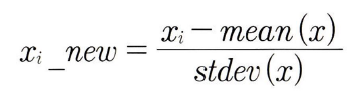




> - 정규화: 서로 다른 피처 크기를 통일하기 위해 크기를 변환주는 개념, 
- 새로운 데이터 xi_new는 원래 값에서 피처 x의 최솟값을 뺀 값을 피처 x의 최댓값과 최솟값의 차이로 나눈 값으로 변환

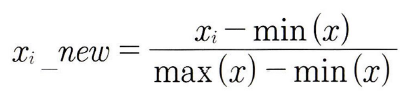


- 하지만, 사이킷런의 전처리에서 제공하는 Normalizer 모듈과 일반적인 정규화에는 차이가 있음
- 벡터 크기를 맞추기 위해 변환하는 것을 의미하므로, 개별 벡터를 모든 피처벡터의 크기로 나눠줌.
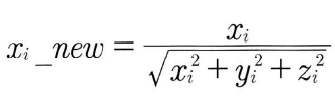

# StandardScaler



> - 표준화를 쉽게 지원하기 위한 클래스
- 개별 피처를 평균이 0, 분산이 1인 값으로 변환해줌
- 특히 서포트 벡터 머신, 선형 회귀, 로지스틱 회귀는 데이터가 가우시안 분포를 갖고 있다고 가정하고 구현하므로 사전에 표준화를 하는 것이 예측 성능 향상에 중요한 요소가 될 수 있음





1. 먼저, 데이터 세트를 확인함

In [38]:
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터 세트를 로딩하고 Dataframe으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature들의 평균 값')
print(iris_df.mean())
print('\nfeature들의 분산 값')
print(iris_df.var())

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


2. StandardScaler로 각 피처를 한 번에 표준화


> - 객체 생성 후 fit(), transform() 메서드에 변환 대상 피처 데이터 세트를 입력하고 호출하면 간단하게 변환됨
- transform()을 호출할 때 스케일 변환된 데이터 세트가 넘파이의 ndarray 이므로, 이를 데이터 프레임으로 변환해 평균값과 분산 값을 다시 확인해 봄



In [39]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()
# StandardScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature들의 분산 값')
print(iris_df_scaled.var())

feature들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


# MinMaxScaler

> - 데이터를 0과 1사이의 범위 값으로 변환(음수가 있으면 -1에서 1값으로 변환)
- 데이터의 분포가 가우시안 분포가 아닐 경우에, Min, Max scale을 적용해 볼 수 있다. 



In [29]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()
# MinMaxScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('feature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


모든 피처에서 0에서 1사이의 값으로 변환되는 스케일링이 적용됐음을 알 수 있다. 

# 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점

- scaler 객체를 이용해 데이터의 스케일링 변환 시 fit(), transform(), fit_transform() 메소드를 이용함
- 일반적으로 fit()은 데이터 변환을 위한 기준 정보 설정(예를 들어 데이터 세트의 최댓값/최솟값 설정 등)을 적용
- transform()은 위와 같이 설정된 정보를 이용해 데이터를 변환
- fit_transform()은 위 둘을 한 번에 적용함

- 학습 데이터세트와 테스트 데이터 세트에 위를 적용할 때 주의할 점: scaler 객체를 이용해 학습한 데이터 세트로 적용하면 테스트 데이터 세트로는 다시 fit()을 수행하지 않고 학습 데이터 세트로 fit()을 수행한 결과를 이용해 transform() 변환을 적용해야 함. 

# 테스트 데이터에 fit()을 적용할 때 어떤 문제가 발생하는 지 알아보기


1. np.arrange()를 이요해 학습 데이터를 0부터 10까지 테스트 데이터를 0부터 5까지 값을 가지는 어레이로 생성

In [30]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1,1)로 차원 변경
train_array = np.arange(0, 11).reshape(-1, 1)
test_array = np.arange(0, 6).reshape(-1, 1)

# MinMaxScaler 객체의 별도의 feature_range 파라미트 값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정.
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함. 원본 10 -> 1 로 변환됨.
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


2. 학습 데이터인 train_array부터 MinMaxScaler를 이용해 변환 하기 


> 이 데이터에 fit()을 적용하면 최솟값 0 최댓값 10이 설정되며 1/10 스케일이 적용됨, transform()을 호출하면 1/10 스케일로 학습 데이터를 변환하게 됨




In [40]:
#MinMaxScaler객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1값으로 변환
scaler=MinMaxScaler()

#fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정.
scaler.fit(train_array)

#1/10 scale로 train_array 데이터 변환함. 원본 10->1로 변환됨.
train_scaled= scaler.transform(train_array)
print('원본 train_array 데이터:',np.round(train_array.reshape(-1),2))
print('scale된 train_array 데이터:',np.round(train_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


3. 테스트 데이터 세트를 변환하는데 fit()을 호출해 스케일링 기준 정보를 다시 적용한 뒤, transform()을 수행한 결과를 확인

In [31]:
# MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

# 1/5 Scale로 test_array 데이터를 변환함. 원본 5 -> 1 로 변환.
test_scaled = scaler.transform(test_array)

# test_array의 scale 변환 출력.
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


- 출력 결과 학습 데이터와 테스트 데이터의 스케일링이 맞지 않음을 알 수 있다. 테스트 데이터의 경우는 최솟값 0 최댓값 5 이므로, 1/5로 스켕리링 됨
- 이렇게 되면 학습 데이터와 테스트 데이터의 서로 다른 원본값이 동일한 값으로 변환되는 결과가 초래
- 머신러닝 모델은 학습 데이터를 기반으로 학습되기 때문에, 반드시 테스트 데이터는 학습 데이터의 스케일링 기준에 따라야 하며,  테스트 데이터의 1 값은 학습 데이터와 동일하게 0.1로 변환돼야 함
- 따라서, 테스트 데이터에 다시 fit()을 적용해서는 안되며, 학습 데이터로 이미 fit()이 적용된 Scaler 객체를 이용해 transform()으로 변환해야 한다. 

# 올바른 방법

테스트 데이터에 fit()을 호출하지 않고, 학습 데이터로 fit()을 수행한 MinMaxScaler 개체의 transform()을 이용해 데이터를 변환

In [41]:
scaler=MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('scale된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

#test_array에 scale변환을 할 때는 반드시 fit()을 호출하지 않고 transform()만으로 변환해야함.
test_scaled=scaler.transform(test_array)
print('원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
원본 test_array 데이터: [0 1 2 3 4 5]
scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


- fit_transform()을 적용할 때도 마찬가지로, fit()과 transdform을 순차적으로 수행하는 메소드이므로 학습 데이터에서는 상관 없지만 테스트 데이터에서는 절대 사용해서는 안됨
- 따라서 학습과 테스트 데이터세트로 분리하기 전에 먼저 전체 데이터 세트에 스케일링을 적용한 뒤 학습과 테스트 데이터 세트로 분리하기 전에 먼저 전체 데이터 세트에 스케일링을 적용한 뒤 학습과 테스트 데이터 세트로 분리하는 것이 바람직

# fit(), transform(), fit_transform() 주의할 점 요약


> 1. 가능하면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리
2. 1이 불가능하다면 테스트 데이터 변환시에는 fit()이나 fit_transform()을 적용하지 않고 학습 데이터로 이미 fit()된 Scaler 객체를 이용해 transform()으로 변환


